# Chicago Public Schools 1+ Data Analysis

**Synopsis**

Data was compiled from the official CPS website on the school search engine: https://www.cps.edu/Schools/Find_a_school/Pages/FindaSchool.aspx

Data was specifically acquired from the 2017-2018 School Quality Rating Report from individual high schools with a performance rating of level 1+, the highest grade given in a school performance assessment, in order to detect any relationships or trends among the metrics (high schools that had complete different measurements or were too distinct were purposely omitted in order to have equal dimensional measures in which to compare against. Also, some data was not available in most schools). 

**Goal**

The aim of this quick data modeling is to attempt to discover any insight on the stregnth of any relationships that the metrics might have among each other. My investigation precisely is to find if there exists any correlation between the features listed below and the rate of student college persistance. I chose college persistance to be the response varaible (the dependent variable) since I am mainly interested in answering the following question, *"what characteristics of a school are the most influential in preparing students to be college-successful?"*  A student's economic standing plays a major role in higher educuation completion especially in light of astronomically rising educational costs. That is the main reason why I decided to include the percentage of low income students as a feature in the model. Lastly, I am going to assume that the relationships among the metrics are linear in nature. This means for example, if SAT scores are linearly postively correlated to college persistance rate, then as the score gets higher the college enrollment rate also moves higher in a consistent and proportional manner (for every point increase in SAT score, college enrollment rate increase by X amount of percentage points). 

To conclude, I hope this data set provides a stepping-stone for future and more vigorous studies to shed light on important findings that can help make better decisions on the improvement of the educational system. 

### Features of data set:
- name of the school
- number of grade levels
- rating of school
- percentage of students deemed low income
- percentage of chronic truancy
- type of school
- student population of the school
- PSAT growth percentile grade 9
- PSAT growth percentile grade 10
- SAT growth percentile grade 11
- Attainment
- graduation rate
- early credits and credentials
- college enrollment rate
- college persistance
- average daily attendance rate
- 1-year drop-out rate
- freshman on track rate

*More information on column labels down at the bottom*

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, easily understood

**Cons:** unlikely to produce the best fit model and predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times low income  + \beta_2 \times population + \beta_3 \times PSAT + ... + \beta_nx_n$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions. However, in this study I will focus more on the magnitudes of the model's coefficients to see their relative strength and influence to college persistance rates.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# remove the hashtag from this bottome line  of code to get the regression graphs to populate on a seperate window
#%matplotlib qt

In [2]:
raw_data = pd.read_csv("one_plus_CPSschools.csv")

In [3]:
# Visual of the csv file containing the dataset

raw_data

,school,hs_yrs,rating,low_inc,chr_tru,type,pop,psat9_growall,psat10_growall,sat11_growall,attainment,grad_rate,early_cred,col_en_rate,col_persist,adar,1yr_dr,fotr
0,von,4,1+,0.746,0.300,magnet,1822,0.73,0.59,0.68,0.623,0.906,0.696,0.806,0.815,0.936,0.004,0.902
1,acero,4,1+,0.934,0.326,charter,608,0.76,0.81,0.49,0.357,0.810,0.524,0.660,0.713,0.950,0.009,0.910
2,amundsen,4,1+,0.775,0.354,neighbor,1309,0.88,0.74,0.56,0.482,0.806,0.429,0.640,0.742,0.924,0.012,0.900
3,BackotYards,4,1+,0.958,0.311,neighbor,1086,0.86,0.80,0.72,0.545,0.913,0.488,NaN,NaN,0.956,0.003,0.996
4,carver,4,1+,0.934,0.046,military,485,0.50,0.44,0.46,0.339,0.898,0.806,0.673,0.667,0.933,0.008,0.959
5,chiarts,4,1+,0.476,0.026,contract,613,0.68,0.37,0.27,0.498,0.823,0.333,0.804,0.889,0.991,0.026,0.918
6,Agri-Sci,4,1+,0.429,0.133,magnet,776,0.82,0.69,0.53,0.586,0.883,0.596,0.767,0.874,0.945,0.006,0.954
7,CICS_NT,4,1+,0.805,0.420,charter,915,0.85,0.70,0.90,0.436,0.834,0.275,0.750,0.844,0.940,0.010,0.977
8,hancock,4,1+,0.851,0.388,selective,1046,0.88,0.69,0.38,0.662,0.803,0.328,0.595,0.669,0.931,0.015,0.982
9,infinity,4,1+,0.967,0.276,small,420,0.91,0.81,0.86,0.404,0.938,0.577,0.660,0.582,0.938,0.012,0.940


Some columns and rows containing irrelevant data for the regression equation will need to be dropped. School names contain no value other than identity purpose, so that will be dropped. Rating of 1+ is a given for all rows (schools) so that is unnecessary to include. High school grade levels offered can be debatable. It can serve as a good argument on grounds that the more grade levels a high school offers, the better positive effect it can have in some area(s). In this linear regression, I will exclude it. I will also exclude school type as this regression's goal is to have pure numerical measures (non-qualitative). 

In [4]:
num_data = raw_data.drop(["school", "hs_yrs", "rating", "type"], axis=1)

In [5]:
num_data

,low_inc,chr_tru,pop,psat9_growall,psat10_growall,sat11_growall,attainment,grad_rate,early_cred,col_en_rate,col_persist,adar,1yr_dr,fotr
0,0.746,0.300,1822,0.73,0.59,0.68,0.623,0.906,0.696,0.806,0.815,0.936,0.004,0.902
1,0.934,0.326,608,0.76,0.81,0.49,0.357,0.810,0.524,0.660,0.713,0.950,0.009,0.910
2,0.775,0.354,1309,0.88,0.74,0.56,0.482,0.806,0.429,0.640,0.742,0.924,0.012,0.900
3,0.958,0.311,1086,0.86,0.80,0.72,0.545,0.913,0.488,NaN,NaN,0.956,0.003,0.996
4,0.934,0.046,485,0.50,0.44,0.46,0.339,0.898,0.806,0.673,0.667,0.933,0.008,0.959
5,0.476,0.026,613,0.68,0.37,0.27,0.498,0.823,0.333,0.804,0.889,0.991,0.026,0.918
6,0.429,0.133,776,0.82,0.69,0.53,0.586,0.883,0.596,0.767,0.874,0.945,0.006,0.954
7,0.805,0.420,915,0.85,0.70,0.90,0.436,0.834,0.275,0.750,0.844,0.940,0.010,0.977
8,0.851,0.388,1046,0.88,0.69,0.38,0.662,0.803,0.328,0.595,0.669,0.931,0.015,0.982
9,0.967,0.276,420,0.91,0.81,0.86,0.404,0.938,0.577,0.660,0.582,0.938,0.012,0.940


Upon close inspection, there are missing fields in the dataset that are represented as NaN. But what if the dataset is enormous and therefore almost impossible to "eye" every single field? We use pandas's built-in functions to do the heavy work.

In [6]:
# number of missing values for each column
num_data.isnull().sum()

low_inc           0
chr_tru           0
pop               0
psat9_growall     1
psat10_growall    1
sat11_growall     1
attainment        0
grad_rate         2
early_cred        2
col_en_rate       5
col_persist       5
adar              0
1yr_dr            0
fotr              1
dtype: int64

In [7]:
# Total number of missing values

num_data.isnull().sum().sum()

18

In [8]:
# We could "zoom" in on a specific column to inspect the NaNs

num_data[num_data.col_en_rate.isnull()]

,low_inc,chr_tru,pop,psat9_growall,psat10_growall,sat11_growall,attainment,grad_rate,early_cred,col_en_rate,col_persist,adar,1yr_dr,fotr
3,0.958,0.311,1086,0.86,0.80,0.72,0.545,0.913,0.488,NaN,NaN,0.956,0.003,0.996
14,0.864,0.446,962,0.58,0.85,0.93,0.428,0.779,0.452,NaN,NaN,0.939,0.002,0.984
15,0.594,0.496,761,0.82,0.75,0.42,0.454,0.804,0.333,NaN,NaN,0.878,0.019,0.914
21,0.863,0.281,482,0.93,0.99,0.97,0.601,NaN,NaN,NaN,NaN,0.944,0.050,0.916
24,0.906,0.392,1100,0.96,0.99,0.97,0.520,NaN,NaN,NaN,NaN,0.928,0.014,0.924


In [9]:
# dropping the rows if they contain any missing values
num_data.dropna(how='any', inplace=True)

In [10]:
# Verify there is no more missing values

num_data.isnull().sum().sum()

0

In [11]:
# Unfortunately this made the dataset lose 5 valuable rows (from 38 to 33 rows). 
# Might not seem much but since this is a small dataset, every row of values counts for a lot.

num_data.shape

(33, 14)

In [12]:
# Prepare the data by predictor variables (X) and response variables (y)
X = num_data.drop(columns=["col_persist"])
y = num_data["col_persist"]

In [13]:
# A visual of the data sub-sets
X, y

(    low_inc  chr_tru   pop  psat9_growall  psat10_growall  sat11_growall  \
 0     0.746    0.300  1822           0.73            0.59           0.68   
 1     0.934    0.326   608           0.76            0.81           0.49   
 2     0.775    0.354  1309           0.88            0.74           0.56   
 4     0.934    0.046   485           0.50            0.44           0.46   
 5     0.476    0.026   613           0.68            0.37           0.27   
 6     0.429    0.133   776           0.82            0.69           0.53   
 7     0.805    0.420   915           0.85            0.70           0.90   
 8     0.851    0.388  1046           0.88            0.69           0.38   
 9     0.967    0.276   420           0.91            0.81           0.86   
 10    0.379    0.202  1929           0.93            0.85           0.87   
 11    0.806    0.368   535           0.34            0.65           0.66   
 12    0.466    0.091  4601           0.89            0.91           0.87   

#### Interpreting model: numerical features only with exclusion of missing values

In [14]:
# Performing Linear Regression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Test linear model on its own data

y_pred = linreg.predict(X)

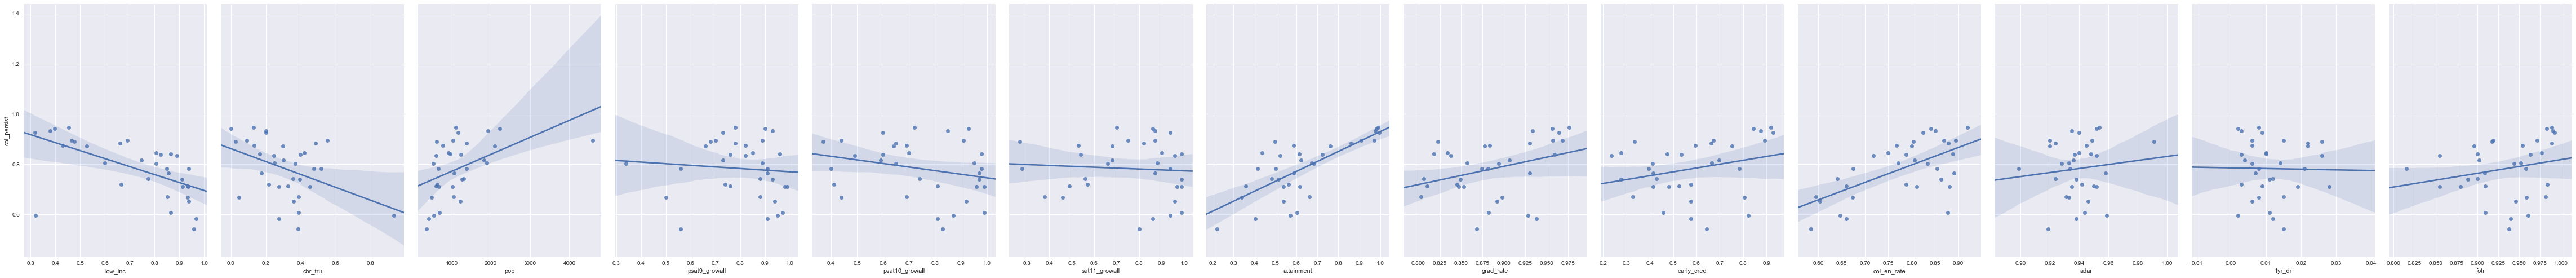

In [16]:
labels = list()

for label in X.columns:
    labels.append(label)

sns.pairplot(num_data, x_vars=labels, y_vars="col_persist", size=7, aspect=0.7, kind="reg")

#### Seperate regression graphs for each feature. Notice how some have high correlations but others do not. 

In [17]:
#model coefficients

for i in list(zip(labels, linreg.coef_)):
    print(i)
print("line intercept", linreg.intercept_)

('low_inc', -0.21780491338513602)
('chr_tru', -0.15083576076379235)
('pop', 2.0723529452662537e-05)
('psat9_growall', 0.00040916285542186293)
('psat10_growall', -0.16437801103634211)
('sat11_growall', -0.012730809614996397)
('attainment', 0.18611259263937652)
('grad_rate', -0.043673256034288344)
('early_cred', -0.14267620453106084)
('col_en_rate', 0.32117236087212359)
('adar', -1.2938768090790873)
('1yr_dr', -0.31191713415745298)
('fotr', -0.28740744283110153)
line intercept 2.33678086165


### Model evaluation metrics for regression



**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [18]:
# Mean Squared Error
mean_squared_error(y, y_pred)

0.0024290767514222565

$$R^2 = 1 - (residual sum of squares \div total sum of squares)$$

In [19]:
# R^2 is the coefficient of determination; 
# how much of the model could explain all the variability of college persistance around its mean

r2_score(y, y_pred)

0.80092306899272347

### Conclusion

In this model,  the average error is relatively low which means that the model typically is not so far off from the true value. However, this is based on data it has trained with, meaning accurate within the dataset's range. The model resultedd with an 80% R-squared (coefficient of determination) which means 80% of the error is a result of variation in the data features (the model overall) and 20% of the error is due to the regression being a poor fit. In other words, the linear model can fairly connect the relationships among the variables. 

Scouring through the coefficient magnitudes and their signs, some results do not make sense. According to the regression equation, SAT percentile growth shows a negative effect at college persistance rate. This goes against common sense as a high score in SAT typically illustrates that the student is college ready and a liklihood of future academic success. Same goes for PSAT for 10th graders. Another counter intuitive result is the inverse relationship between graduation rate and college persistance. The regression model shows that for every percentage point increase in graduation rate, college persistance goes down by 0.04 units. Same goes for early credentials, average daily attendance rate, and freshman on track. The rest of the variables make sense, such as college enrollment rate (the greater the rate of college enrollment the higher the rate of college persistance). If we look at the individual variable regressions above, they portray a better relationship in terms of direction in which they move; although, it does have its flaws just as the multi-regression. Most plots of the single variate regressions show more of a random pattern than a linear one. 

The bizarre results can be due to various reasons such as multicollinearity; scale and unit incompatibility; heteroskedasticity; wrong equation/model for this problem; improper data or insufficient data to predict college success. 

# Neural Network Model

Neural Networks are known to be the universal function finder. That is, a neural network is not limited to modeling data strictly on a single type of rigid model such as linear regression. It can learn to approximate an unknown function that will model the inputs X and output y. Neural Networks does have its drawbacks. NN consumes time as the data or model complexity increases, and it also is computational demanding. Another drawback is that it is very hard to interpret the model once it has learned the relationships between the features. NN are essentially stacks upon stacks of equations, as opposed to the simple single linear equation. As a result, what makes it difficult is the multiple coefficients it has (see NN.coefs_ output to see the numerous coefficients). 

In [42]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor

In [37]:
X = np.asarray(X)

y = np.asarray(y)

In [44]:
NN = MLPRegressor(activation="logistic", solver="lbfgs")

NN.fit(X, y)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [60]:
#coefficients of NN model
NN.coefs_

[array([[ 0.1060852 ,  0.12324372, -0.00650772, ...,  0.11094038,
         -0.09710369,  0.0652464 ],
        [ 0.09638592, -0.03479402,  0.03718528, ..., -0.11023621,
         -0.06351581, -0.04933439],
        [-0.06736883,  0.04444436, -0.04249107, ...,  0.11776399,
         -0.19103664, -0.07491872],
        ..., 
        [-0.07278681,  0.10066323, -0.09116345, ...,  0.11393042,
         -0.00157945, -0.02139391],
        [ 0.01107735, -0.06550433, -0.07868733, ...,  0.0265419 ,
         -0.12692114,  0.08257062],
        [ 0.13029167,  0.04799933,  0.05914809, ..., -0.069726  ,
          0.03207406,  0.05521602]]), array([[-0.09534144],
        [-0.13280932],
        [-0.00872846],
        [ 1.53840251],
        [ 0.11280707],
        [ 0.02490184],
        [-0.06874607],
        [-0.13416441],
        [-0.03299724],
        [ 0.07425807],
        [ 0.05751543],
        [ 0.12749743],
        [ 0.13997248],
        [ 0.0533599 ],
        [-0.00994134],
        [-0.11619783],
     

In [63]:
NN.intercepts_

[array([ 0.11721653, -0.08471772,  0.02747471, -0.12031397, -0.02809199,
        -0.01088964,  0.08564939,  0.0838132 , -0.07551303, -0.0880325 ,
         0.1087363 , -0.04951118,  0.11736002,  0.11988059, -0.03279315,
         0.04492055, -0.04952152,  0.04470111, -0.01023879, -0.06240088,
        -0.10029491,  0.07749472, -0.07942121, -0.11363924, -0.11768108,
         0.0327189 ,  0.1122612 , -0.00098316, -0.1243728 ,  0.00774725,
        -0.12015399, -0.0050491 ,  0.02227713,  0.01649228,  0.04301438,
         0.05036124,  0.09604064,  0.00385578,  0.04392083,  0.12150254,
         0.0830167 ,  0.06622255,  0.10631703,  0.03127856,  0.05591266,
        -0.08283268,  0.0245304 , -0.06946068,  0.11326283,  0.0042401 ,
        -0.00903018,  0.00340169,  0.06613871, -0.07162809,  0.03509866,
        -0.04011299, -0.05941039,  0.05018943, -0.10192418,  0.02683961,
         0.09437723, -0.01407192, -0.04868981, -0.09104516, -0.01671861,
        -0.01758018, -0.01029287, -0.05354209,  0.1

In [48]:
# The error the network had at its learning completion

NN.loss_

0.002399259010563746

In [57]:
# Neural Network's version of R-squared (coefficient of determination)

NN.score(X, y)

0.6113340182089444

In [62]:
NN.n_layers_

3

In [67]:
# Application of a normalizer to fit all input data between an interval of 0 to 1. This approach is to "equalize" all scales and units in the feature set.

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalized_X = scaler.transform(X)

In [68]:
NN = MLPRegressor(activation="logistic", solver="lbfgs")

NN.fit(X, y)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
NN.score(X, y)

0.62599478624408378

### Conclusion

After applying a stronger model, a neural network with 3 layers, the score or R^2 came out to be 62%. This is far less than linear regression's 80% R^2, even with a normalizer application. Since units and scales are not at the root of the cause, my suspicion is with the data itself. It is either insufficient or most likely the rates are derived from other rates and hence multicollinearity arises-- when one predictor variable is computed from other variables of the data. R-squared can be artificially high by adding more features (independent variables). The more features in a linear regression, the smaller the sum of errors the model will have relatative to the error of the mean of observed (real y-values) dependent variable. So in my future additions to this project, I will be amending this downfall of R-squared by using the adjusted R-squared that decreases when a useless variable is introduced. Conversely, it increases when a significant variable is incorporated in the model. Both metrics are still crucial as R-squared tells you how well your model fits the data. The adjusted R-square is a gauge on how important a particular feature is to the model. As a result, I will still be keeping R-squared and just keep adding more model metrics and altering specifications on the model(s) if I deem it necessary. 

##### labels and quick descriptions:

school - the name of the school

hs_yrs - the grade levels the school offers. Some schools offer more or less than the traditional 4            years of high school, grades 9-12. 

rating - rating is based on the CPS School Quality Rating Policy. This dataset contains only 1+ rated          high schools (more info on rating https://cps.edu/Performance/Pages/PerformancePolicy.aspx).

low_inc - percentage of students of the school that are considered low income.

chr_tru - percentage of students who have unexcused absences that exceed 5% of regular attendance               days.

type - category of type of school. There are about 7 distinct types of schools in this dataset. 

pop- number of students enrolled in school

psat9_growall - growth percentile of all students in grade 9; measures the change in standardized test                 scores between two points in time. 

psat10_growall - growth percentile of all students in grade 10;  measures the change in standardized                    test scores between two points in time. 

sat11_growall - growth percentile of all students in grade 11; measures the change in standardized                     test scores between two points in time 

attainment - percent of students meeting college readiness benchmarks

grad_rate - 4 year cohort graduation rate based on the performance of a group of students observed                 for the amount of time specified. 

early_cred - percentage of students earning college credit or other credentials

col_en_rate - percentage of students enrolling in post-secondary school.

col_persist - percentage of students staying enrolled at a post-secondary school. 

adar - the average daily attendance rate

1yr_dr - the one year drop out rate

fotr - percentage of freshman on track to graduaute